# Obj:
To build a model to forecast the demand(passenger traffic) of traffic using time series algorithms

# Case Study
Domain –SEA Transportation
focus –forecast demand

Business challenge/requirement: SeaPort is the largest operator of Sea Planes across sea shores in Europe.  SeaPort doesn't have planes of their own, rather they lease themon a short termbasis based on passenger traffic.You as an ML expert have to builda model to forecast the demand (passenger traffic) of traffic. 

Key issues: As of now utilization of Planes is low due to poor forecastsof traffic
    
Data volume-Approx 144 records–data month wise for last 12 years –file SeaPlaneTravel.csv Fields in Data•Month: Month in which traffic data was recorded •'#Passenger': No of travellers availing Service in that month
        
Additional information-NABusiness benefitsBetter utilization of planes will lead to decrease in cost and hence better bottom line


In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r'C:\Users\je638474\Documents\JJ\Folders\Udemy\Python EDUREKA')

In [3]:
dataset = pd.read_csv('SeaPlaneTravel.csv')

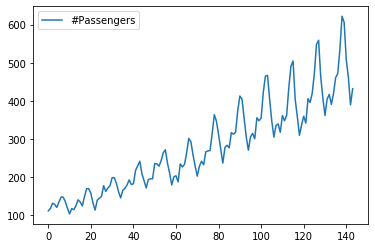

In [4]:
dataset.plot()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
dataset.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [7]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [8]:
dataset.set_index('Month', inplace=True)

In [9]:
dataset.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


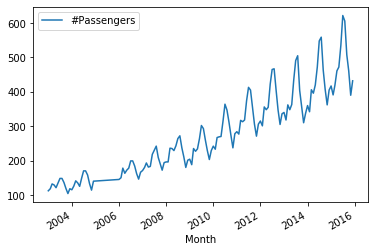

In [10]:
dataset.plot()

C:\Users\je638474\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


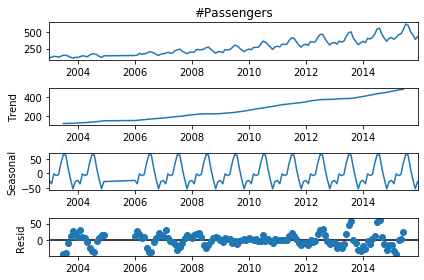

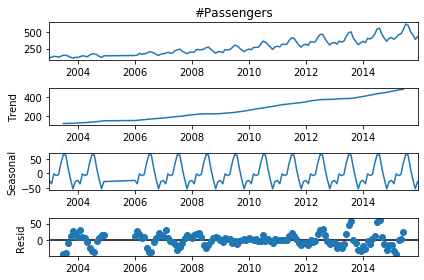

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositon = seasonal_decompose(dataset['#Passengers'], freq=12)
decompositon.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['#Passengers'])


(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [13]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'p-Value', '#Lags', 'No of Obs']
    for value, labels in zip(result, labels):
        print(labels + ':' + str(value))
    if result[1]<=0.05:
        print('Time series is stationary')
    else:
        print('Time Series is not stationary')

In [14]:
adf_check(dataset['#Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic:0.8153688792060423
p-Value:0.9918802434376409
#Lags:13
No of Obs:130
Time Series is not stationary


In [15]:
dataset['#Passengers 1st Diff'] = dataset['#Passengers'] - dataset['#Passengers'].shift(1)

In [16]:
adf_check(dataset['#Passengers 1st Diff'].dropna())
#d=1

Augmented Dickey Fuller Test
ADF Test Statistic:-2.8292668241699874
p-Value:0.05421329028382711
#Lags:12
No of Obs:130
Time Series is not stationary


In [17]:
dataset['#Passengers 2nd Diff'] = dataset['#Passengers 1st Diff'] - dataset['#Passengers 1st Diff'].shift(1)

In [18]:
dataset

,#Passengers,#Passengers 1st Diff,#Passengers 2nd Diff
Month,,,
2003-01-01,112,NaN,NaN
2003-02-01,118,6.0,NaN
2003-03-01,132,14.0,8.0
2003-04-01,129,-3.0,-17.0
2003-05-01,121,-8.0,-5.0
...,...,...,...
2015-08-01,606,-16.0,-103.0
2015-09-01,508,-98.0,-82.0
2015-10-01,461,-47.0,51.0


In [19]:
adf_check(dataset['#Passengers 2nd Diff'].dropna())
#d=2

Augmented Dickey Fuller Test
ADF Test Statistic:-16.384231542468513
p-Value:2.7328918500142026e-29
#Lags:11
No of Obs:130
Time series is stationary


In [20]:
dataset['Seasonal Diff'] = dataset['#Passengers']-dataset['#Passengers'].shift(12)

In [21]:
dataset.to_csv('seasonaldiff.csv')

In [22]:
adf_check(dataset['Seasonal Diff'].dropna())
#D=1

Augmented Dickey Fuller Test
ADF Test Statistic:-3.3830207264924805
p-Value:0.011551493085514982
#Lags:1
No of Obs:130
Time series is stationary


In [23]:
dataset['Seasonal Diff']-dataset['Seasonal Diff'].shift(12)

Month
2003-01-01     NaN
2003-02-01     NaN
2003-03-01     NaN
2003-04-01     NaN
2003-05-01     NaN
              ... 
2015-08-01    -7.0
2015-09-01   -14.0
2015-10-01     6.0
2015-11-01   -24.0
2015-12-01   -41.0
Name: Seasonal Diff, Length: 144, dtype: float64

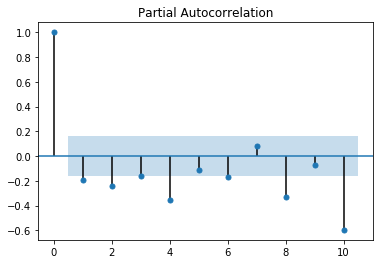

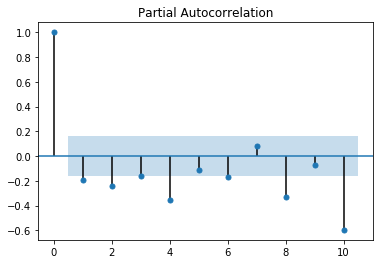

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(dataset['#Passengers 2nd Diff'].dropna(),lags=10)
#p=0

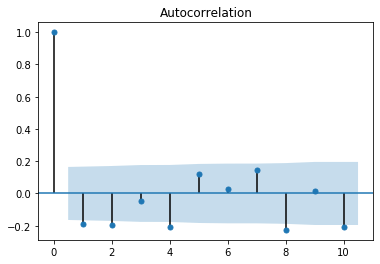

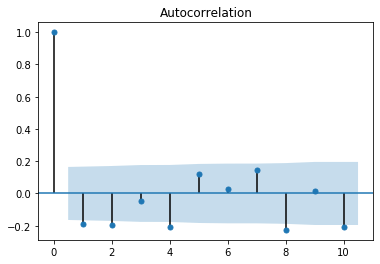

In [25]:
plot_acf(dataset['#Passengers 2nd Diff'].dropna(), lags=10)
#q=0

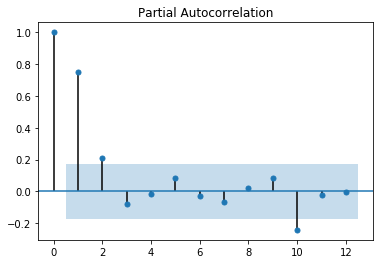

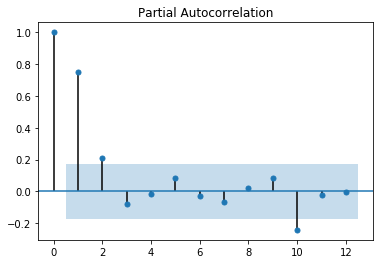

In [26]:
plot_pacf(dataset['Seasonal Diff'].dropna(),lags=12)
#P=1

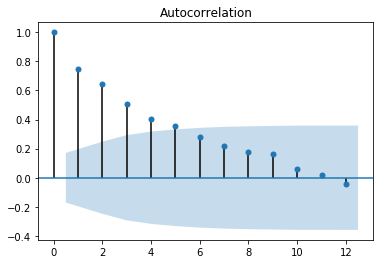

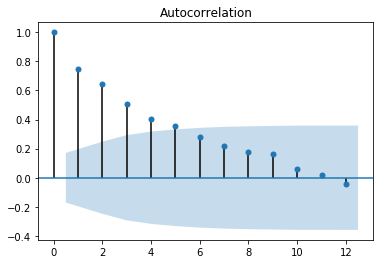

In [27]:
plot_acf(dataset['Seasonal Diff'].dropna(), lags=12)
#Q=2

In [28]:
#d = 2, D = 1, p = 0, P = 1 , q = 0, Q = 2

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [30]:
model = sm.tsa.statespace.SARIMAX(dataset['#Passengers'], order=(1,2,1), 
                                  seasonal_order=(1,2,1,12))
results = model.fit()
print(results.summary())

C:\Users\je638474\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\je638474\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -467.460
Date:                            Sun, 13 Sep 2020   AIC                            944.920
Time:                                    16:52:29   BIC                            958.774
Sample:                                         0   HQIC                           950.545
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4157      0.081     -5.106      0.000      -0.575      -0.256
ma.L1         -0.9999     20.269   

C:\Users\je638474\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


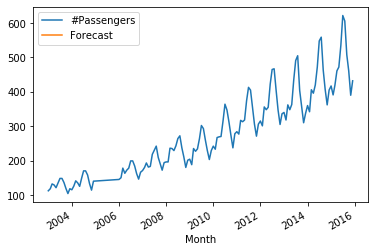

In [31]:
dataset['Forecast'] = results.predict(start=130, end=144, dynamic=True)
dataset[['#Passengers', 'Forecast']].plot()

In [32]:
len(dataset)

144

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [34]:
future_dates

[Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00')]

In [35]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns=dataset.columns)

In [36]:
future_dates_df

,#Passengers,#Passengers 1st Diff,#Passengers 2nd Diff,Seasonal Diff,Forecast
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df = pd.concat([dataset, future_dates_df])

In [38]:
future_df

,#Passengers,#Passengers 1st Diff,#Passengers 2nd Diff,Seasonal Diff,Forecast
2003-01-01,112,NaN,NaN,NaN,NaN
2003-02-01,118,6.0,NaN,NaN,NaN
2003-03-01,132,14.0,8.0,NaN,NaN
2003-04-01,129,-3.0,-17.0,NaN,NaN
2003-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2017-07-01,NaN,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN


C:\Users\je638474\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\je638474\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


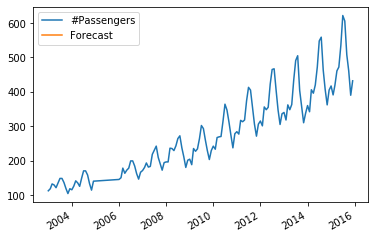

In [39]:
future_df['Forecast'] = results.predict(start =  145, end=300 , dynamic =True)
future_df[['#Passengers', 'Forecast']].plot()

In [40]:
future_df

,#Passengers,#Passengers 1st Diff,#Passengers 2nd Diff,Seasonal Diff,Forecast
2003-01-01,112,NaN,NaN,NaN,NaN
2003-02-01,118,6.0,NaN,NaN,NaN
2003-03-01,132,14.0,8.0,NaN,NaN
2003-04-01,129,-3.0,-17.0,NaN,NaN
2003-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2017-07-01,NaN,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN


# End